# Introdução ao Scikit-Learn e avaliação do modelo

## Objetivos do aprendizado:
    
    - Explicar a variável de reposta;
    - Descrever as implicações de dados desbalanceados na classificação binária;
    - Dividir os dados em conjuntos de treinamento e teste;
    - Descrever o ajuste do modelo no scikit-learn;
    - Derivar várias métricas para a classificação binária;
    - Criar uma curva ROC e uma curva precision-recall;
    
Esse capítulo concluirá a análise exploratória inicial e apresentará novas ferramentas para execução da avaliação
do modelo.

## Introdução:
    
    Nesse capítulo concluiremos nossa exploração dos dados examinando a variável reposta. Após concluirmos que os 
dados têm alta qualidade e fazem sentido, estaremos prontos para passar para as preocupações práticas do desenvol-
vimento de modelos de machine learning.Daremos os primeiros passos com o Scikit-learn, um dos mais populares paco-
tes de machine learning disponíveis na línguagem Python. 

### Examinando a variável de resposta e concluindo a exploração inicial

Já foram investigadas todas as características não apenas ver se algum dado está faltando, mas também para 
verificá-las de um modo geral. Elas são importantes por serem as entradas de nosso algoritmo de machine learning.
No outro lado do modelo fica a saída, uma previsão da variável resposta. Para nosso problema, ela é uma flag biná-
ria indicando se uma conta ficará ou não inadimplente no próximo mês, que seria outubro no histórico do dataset.

Nossa missão maior nesse projeto é criar um modelo preditivo para esse objetivo. Já que a variável de resposta
é uma flag sim/não, esse problema chama-se tarefa de classificação binária. Em nossos dados rotulados, consideramos
que as amostras(contas) que ficarão inadimplentes (isto é, com status 'default payment next month', [falta de 
pagamento no próximo mês] = 1) pertecem á classe positiva, enquanto as que não ficarão pertecem á classe negativa.

A informação mais importante que devemos examinar com relação à resposta de um problema de classificação biná-
ria é: qual é a proporção da classe positiva?

##### Antes de fazer essa verificação, é essencial carregar os pacotes requeridos

In [1]:
import numpy as np # Cálculo Numérico
import pandas as pd # preparação dos dados
import matplotlib.pyplot as plt # Pacote de plotagem

In [2]:
# A próxima linha ajuda a renderizar plotagens
%matplotlib inline
import matplotlib as mpl # Adiciona a funcionalidade de plotagem
mpl.rcParams['figure.dpi'] = 400 # figuras em alta resolução

In [3]:
# Também precisamos da versão limpa dos dados do estudo de caso
df = pd.read_csv('../Data/Chapter_1_cleaned_data.csv')

##### Nota => O dataset limpo, deve ter sido salvo como resultado do trabalho no Cap. 01 Exploração e limpeza dos dados

##### Para encontrar a proporção da classe positiva, é preciso apenas obter a média da variável de reposta no datasetset
inteiro. Ela terá a interpretação da taxa de inadimplência. Também é útil verificar o número de amostras em cada 
classe.

In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

##### Já que a variável alvo é 1 ou 0

A obtenção da média dessa coluna indica o percentual de contas que ficaram inadimplentes: 22%. Também confirmamos o
número de contas de cada classe executando uma operação groupby/count. A proporção de amostras na claasse positiva
(inadimplência = 1), também chamada de fração da classe, é uma estatística importante. Na classificação binária, os
datasets são descritos considerando-se se eles estão balanceados ou desbalanceados: as proporções de amostras posi-
tivas e negativas são ou não são iguais? A maioria dos modelos de classificação de machine learning é projetada pa-
ra operar com dados balanceados: uma divisão 50/50 entre as classes.

No entanto, na prática, raramente os dados reais são balanceados. Consequentemente, há vários métodos que têm como 
objetivo lidar com dados desbalanceados.

São os seguintes:
    
    * Subamostragens(undersampling) da classe majoritária => Eliminar aleatoriamente amostras da classe majoriária
    até as frações das classes serem iguais, ou no mínimo menos desbalanceadas.
    
    * Sobreamostragem(oversampling) da classe minoritária => Adicionar aleatoriamente amostras duplicadas da classe
    minoritária para atingir o mesmo objetivo.
    
    * Ponderação de amostras(weighting samples) => Esse método é executado como parte da etapa de treinamento, para
    que a classe minoritária receba coletivamente a mesma "ênfase" da classe majoritária no modelo ajustado. O 
    efeito é semelhante ao do oversampling.

##### Introdução ao scikit-learn

Embora o pandas poupe muito tempo no carregamento, exame e limpeza de dados, os algoritmos de machine learning que 
nos permitirão executar a modelagem preditiva estão localizados em outros pacotes. Consideramos o scikit-learning 
como o principal pacote de machine learning para Python, com exceção dos de deep learning. Mesmo sendo impossível 
para qualquer pacote oferecer "tudo", o scikit-learn chega perto ao acomodar uma ampla variedade de abordagens para
classificação e regressão, e aprendizado não supervisionado. Dito isso, outros pacotes que deveria conhecer:
    
SciPy:
    * A maioria dos pacotes que samos até agora na verdade faz parte do ecosistema SciPy.
    * O SciPy também oferece funções leves para abordagens clásssicas como regressão linear e programação linear.
    
StatsModels:
    * Orientado para estatística e mais fácil para usuários familiarizados com o R.
    * Consegue obter valores-p e intervalos de confiança em coeficientes de regressão
    * Suporta modelos de séries temporais como o ARIMA.
    
XGBoost:
    * Oferece um modelo de combinações (ensemble model) de última geração, o qual com frequência supera as
    florestas aletórias.
    
TensorFlow, Keras e PyTorch:
    * Recursos de deep learning.
    
O scikit learn encapsula as funcionalidades básicas no método .fit para o treinamento de modelos, e no método 
.predict para execução de previsões.Devido a sintaxe consistente, pode chamar .fit e .predict em qualquer modelo do
scikit-learn, seja de Regressão linear ou de árvores de classificação.

##### Primeira etapa: 
    
    Selecionar algum modelo, nesse exemplo uma regressão logística, e instanciá-lo a partir da classe fornecida
pelo scikit-learn. Isso significa que estará obtendo o blueprint do modelo que o scikit-learn disponibiliza e 
criando um objeto útil a partir dele. Pode treinar esse objeto com seus dados e salvá-lo em disco, uso posterior.

##### Os fragmentos de código a seguir podem ser usados para a execução desse tarefa. Primeiro importar a classe

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
# O Código que instancia a classe para criar um objeto é:
my_lr = LogisticRegression()

In [8]:
# Agora o objeto é uma variável em nosso espaço de trabalho. Podemos examainá-la usando o código a seguir:
my_lr

LogisticRegression()

In [9]:
# Aqui está o código para instanciação de um modelo de regressão de logística com todas as opções padrão:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
                              max_iter=100, multi_class='warn', n_jobs=None, penalty='l2', random_state=None, 
                              solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [10]:
my_new_lr

LogisticRegression(multi_class='warn', solver='warn')

In [11]:
# O Código a seguir define duas opções e exibe o estado atual do objeto de modelo:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [12]:
my_new_lr

LogisticRegression(C=0.1, multi_class='warn', solver='liblinear')

##### Como sabemos, os algoritmos de aprendizado supervisionado dependem dos dados rotulados.

Isso significa que precisamos tanto das características normalmente contidas em uma variável chamada X, quanto das 
respostas correspondentes, em uma variável y.

In [13]:
# Tomaremos emprestadas em nosso dataset as 10 primeiras amostras de uma única característica, e a resposta
X = df['EDUCATION'][0:10].values.reshape(-1, 1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [14]:
# Os 10 primeiros valores correspondentes da variável resposta podem ser obtidos assim:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

##### Scikit-learn espera que a primeira dimensão(o número de linhas)do array de característica seja o número de amostras

Logo tivemos de fazer o redimensionamento para X mas não para y. O -1 no primeiro argumento posicional de .reshape
torna a forma do array de saída flexível nessa dimensão, de acordo com o número de dados que entrarem. 

Já que temos apenas uma característica nesse exemplo, especificamos o número de colunas como segundo argumento, 1,
e deixamos que o argumento -1 indique que o array deve "ser preenchido" ao longo da primeira dimensão com quantos 
elementos forem necessários para acomodar os dados, nesse caso 10 elementos.

Observe que, emboara tenhamos extraído os dados, para inseri-los em arrays NumPy e mostrar como isso pode ser feito
também poderíamos ter usado séries do pandas como entrada para o scikit-learn

In [15]:
# Ajustar o hiperparâmetro multi_class para auto
my_new_lr.multi_class = 'auto'

In [16]:
# Agora usaremos esses dados para ajustar nossa regressão logística.
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [17]:
# Podemos selecionar e visualizar essas características usando uma nova variável, new_X
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [18]:
# As previsões são feitas assim:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Também podemos visualizar quais são os valores reais correspondentes a essas previsões:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

##### Observe que o único argumento desse método é um conjunto de características, isto é, um "X", que chamamos de new_X

Nesse caso, não foi fornecido um "y". Na verdade, é para isso que serve a modelagem preditiva: você não sabe 
necessariamente o valor verdadeiro da variável de resposta, logo, tem de poder prevê-lo. Vimos que a saída do 
método .predict são as previsões do modelo para essas amostras

##### Gerando dados sintéticos

Os pacotes Python são suficientes para a execução de um amplo conjunto de projetos de ciência de dados, de 
classificação à regressão e ao aprendizado não supervisionado. E também como funciona o ajuste de um modelo no 
Scikit-Learn, um dos pacotes de machine learning mais úteis em Python.

Para ter dados para ajustar, será gerado os nossos próprios dados sintéticos, uma ferramenta de aprendizado valiosa
para ilustrar conceitos matemáticos. Para criar dados sintéticos, será mostrado novamente como usar a biblioteca
random do NumPy para a geração de números aleatórios, assim como as funções scatter e plot do matplotlib para criar
as plotagens de dispersão e linear, respectivamente. 

Para começar, será usado o NumPy para criar um array unidimensional de valores de características chamado x e 
composto de 1.000 números reais aleatórios e depois será examinado os 10 primeiros.

In [20]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

##### Dados para uma regressão linear

Agora será precisamos de uma variável de resposta. Para esse exemplo, geraremos dados que se baseiam nas suposições
da regressão linear: obedecem a uma tendência linear, mas tem erros normalmente distribuídos. É improvável que um 
DataSet do mundo real atenda ás suposições estatísticas formais de um modelo como esse, mas pode ser criado um 
conjunto de dados sintéticos que o faça. 

Teoricamente a regressão linear, só deve ser usada para modelar dados em que a resposta seja uma transformação 
linear das características, com ruído normalmente distribuído (também chamado de gaussiano):

In [21]:
# O Código para criação dos dados lineares com ruído gaussiano:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

##### Agora queremos visualizar os dados. Usaremos o matplotlib para plotar y em relação à característica X como uma 
##### plotagem dispersa.

Primeiro utilizaremos .rcParams para definir a resolução (dpi = dots per inch [pontos por polegada]) para uma 
imagem de boa nitidez. 

Em seguida, criaremos a plotagem dispersa com plt.scatter, em que os dados  X e y são os dois primeiros argumentos
respectivamente e o argumento s recebe um tamanho para os pontos

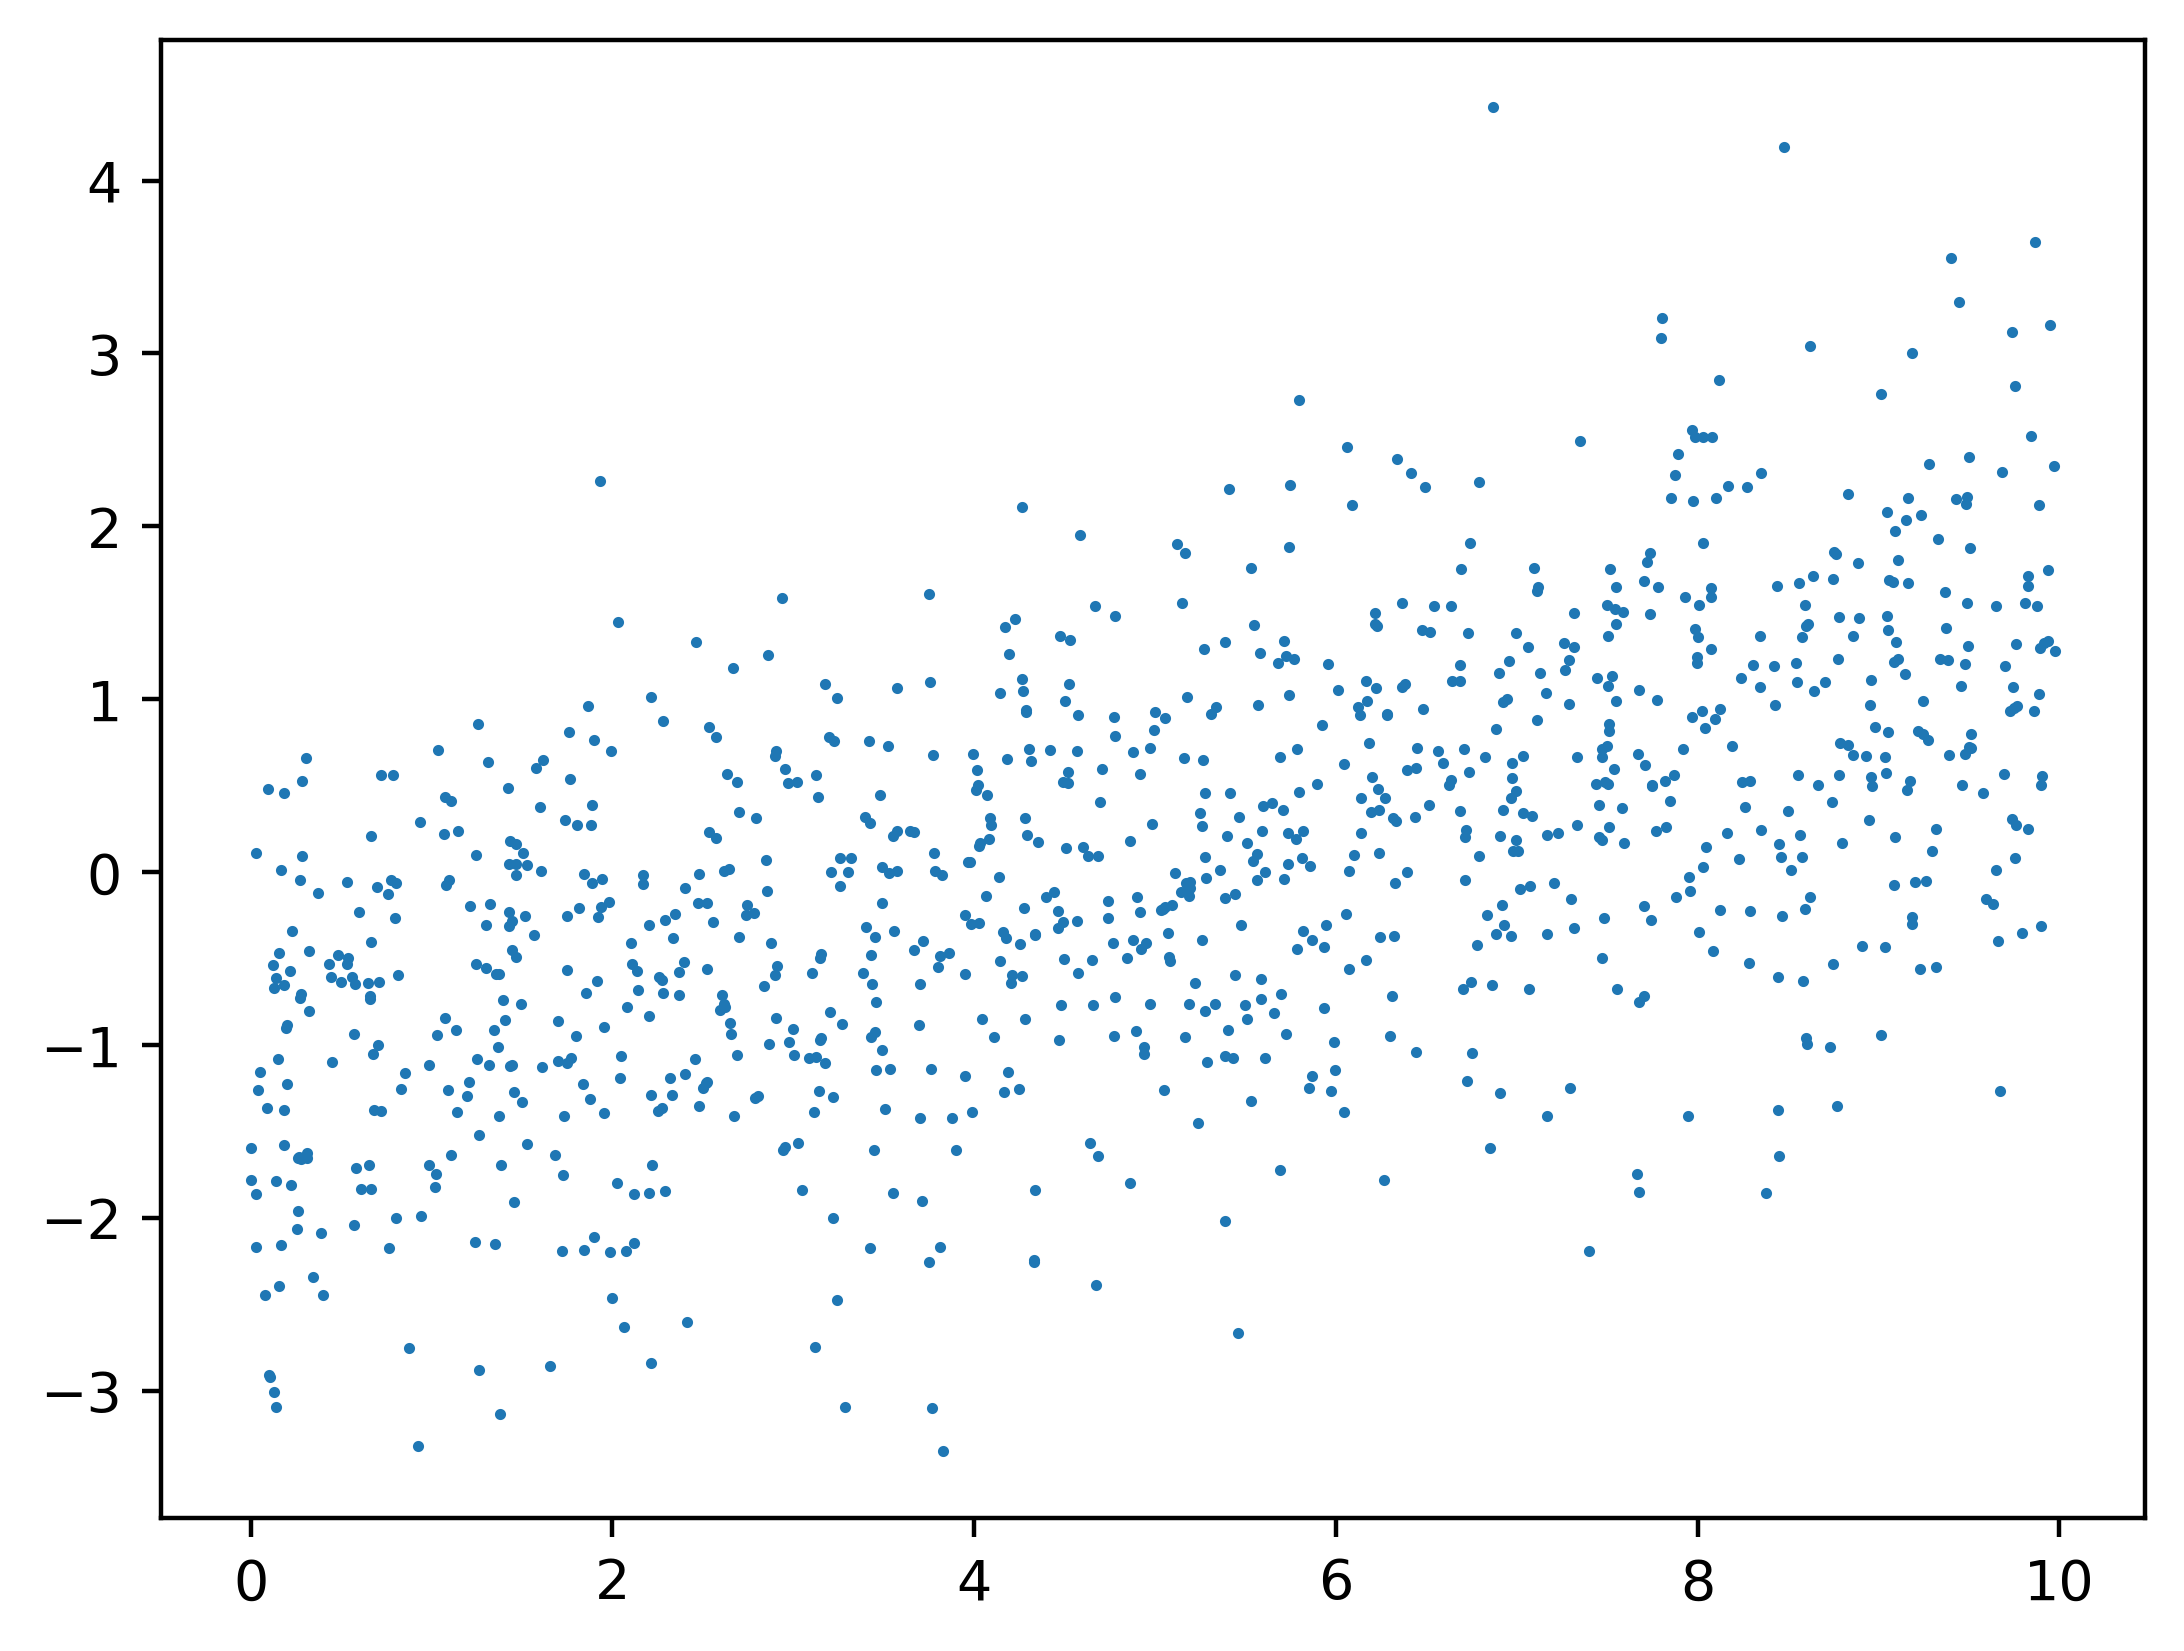

In [22]:
# Código usado para a plotagem:
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)

### Exercício 8: Regressão Linear com Scikit-Learn
    
Nesse exercício, pegaremos os dados sintéticos que acabou de ser gerado, e será determinado uma linha de melhor 
ajuste, ou regressão linear, usando o scikit-learn. A primeira etapa é importar uma classe de modelo de regressão linear do scikit-learn e criar um objeto a partir dela.

A importação é semelhante à da classe LogisticRegression que foi importamos anteriormente. Como em qualquer classe de modelo, você deve observar todas as opções padrão. Repare que, nesse caso, para uma regressão linear, não há tantas opções a serem especificadas: pode usar os padrões para esse exercício. 

As configurações padrão incluem fit_intercept=True, significando que o modelo  de regressão terá um termo para a interceptação. Isso é, sem dúvida, apropriado, já que adicionamos uma interceptação aos dados sintéticos. Execute as etapas a seguir para fazer o exercício.

In [23]:
# 1) Execute esse código para importar a classe de modelo de regressão linear e instanciá-la:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

Agora podemos ajustar o modelo usando nossos dados sintéticos, lembrando-nos de redimensionar o array de características, como fizemos anteriormente, para que as amostras fiquem ao longo da primeira dimensão. 

Após ajustar o modelos de regressão linear, examinaremos lin_reg.intercept_, que contêm a interceptação do modelo ajustado, como era de se esperar, e lin_reg.coef_, que contém a inclinação.

In [24]:
# 2) Execute esse código para ajustar o modelo e examinar os coeficientes:
lin_reg.fit(X.reshape(-1,1),y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825873
[0.24002588]


Podemos ver novamente que ajustar um modelo no scikit-learn, após os dados estarem preparados e as opções do modelo terem sido definidas, é um processo trivial. Isso ocorre porque o usuário não precisa fazer todo o trabalho algorítmico de determinar os parâmetros do modelo. 

##### E quanto a inclinação e à interceptação de nosso modelo ajustado?

Esses números estão bem próximos da inclinação e da interceptação que indicaremos ao criar o modelo. No entanto, devido ao ruído aleatório, são apenas aproximações.Finalmente podemos usar o modelo para fazer previsões de valores das características. Aqui faremos isso empregando os mesmos dados utilizados no ajuste do modelo: o array de características, X. Capturaremos a saída como uma variável chamada y_pred: esse caso é muito parecido com o anterior, só que agora estamos inserindo a saída do método .predict em uma variável 

In [25]:
# 3) Execute esse código para fazer previsões
y_pred = lin_reg.predict(X.reshape(-1, 1))

Podemos exibir as previsões, y_pred, da característica X como uma plotagem linear sobre a plotagem dispersa dos dados da característica e da resposta como fizemos na Etapa 4. Aqui repetimos a Etapa 4, com o acréscimo de plt.plot, que produz uma plotagem linear por padrão, para plotar os valores da característica e da resposta prevista pelo modelo. Observe que após os dados X e y inserimos 'r' em nossa chamada a plt.plot. Esse argumento de palavra-chave dá à linha a cor vermelha e faz parte de uma sintaxe abreviada para a formatação da plotagem.

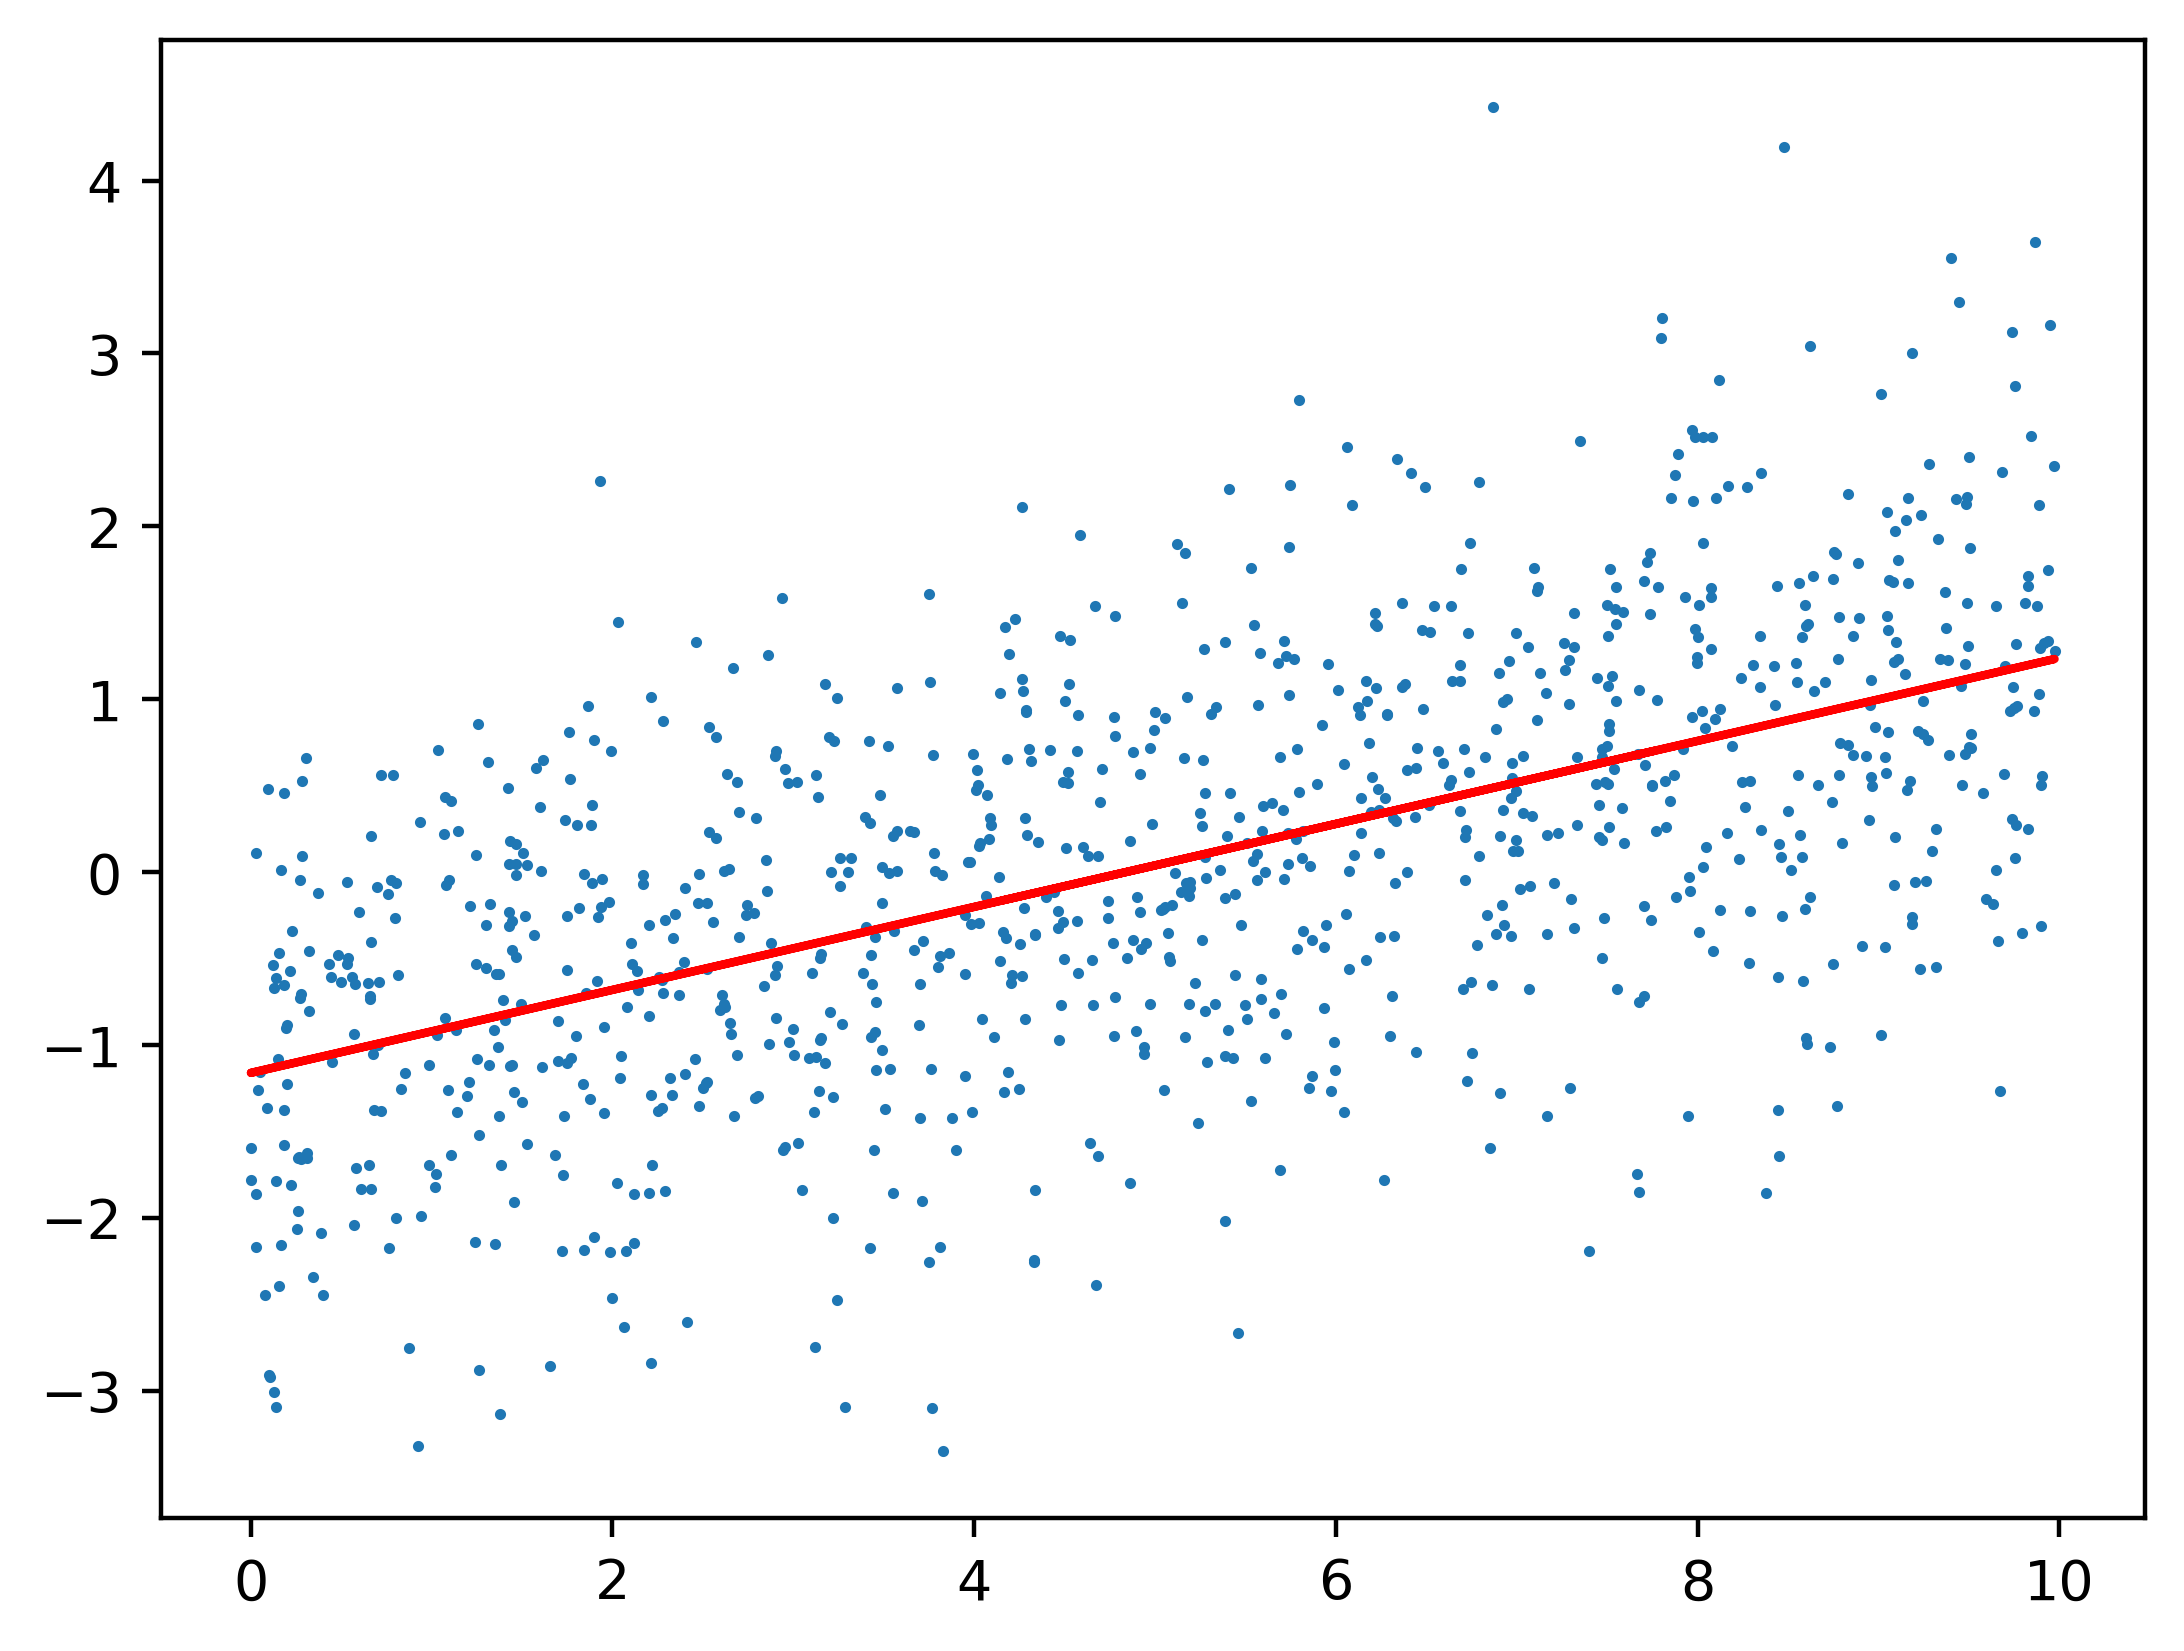

In [26]:
#4)Esse código pode ser usado para plotar os dados brutos e as previsões do modelo ajustado feitas para estes dados
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

A plotagem exibe como seria a linha de melhor ajuste para os dados, como esperávamos.

Nesse exercício, ao contrário do quando chamamos .predict com a regressão logística, fizemos previsões para os mesmos dados X que usamos para treinar o modelo. Essa é uma diferença importante. Enquanto no caso atual estamos vendo como o modelo "ajusta" os mesmos dados com os quais foi treinado, anteriormente examinamos previsões  do modelo para dados novos e desconhecidos. Em machine learning, geralmente o que nos interessa são os recursos preditivos: queremos modelos que nos ajudem a saber os possíveis resultados de futuros cenários. No entanto, no fim das contas as previsões tanto dos dados de treinamento usados para ajustar o modelo, quanto dos dados de teste, que não foram usados no ajuste, são importantes para entendermos o funcionamento do modelo.

### Métricas de desempenho de modelos para a classificação binária

Antes de começar realmente a construir modelos preditivos, queremos saber como podemos determinar, após criar um modelo, se ele é de alguma forma "bom". 
Como era de se esperar, essa questão tem recebido muita atenção de pesquisadores e profissionais da área. Consequentemente, há uma grande variedade de métricas de desempenho de modelos para escolhermos.



### Dividindo os dados: conjuntos  de treinamento e de teste
    
Para saber o nível de eficiência que podemos esperar de nosso modelo na previsão da contas que ficarão inadimplentes em novembro, podemos pegar o dataset atual e reservar alguns dos dadosque temos, com rótulos conhecidos, do processo de treinamento do modelo.
Esses dados são chamados de "dados de teste", mas também podem ser chamados de "dados fora da amostra" já que são compostos de amostras que não foram usadas no treinamento do modelo. As amostras usadas para treinar o modelo são chamadas de "dados de treinamento".

Separar um conjunto de dados de teste nos dará uma ideia de como será o desempenho do modelo quando ele for usado para sua finalidade, fazer previsões para amostras que não foram incluídas durante seu treinamento.

In [27]:
# Não há uma regra rígida para o dimensionamento dos conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['EDUCATION'].values.reshape(-1, 1), df['default payment next month'].values, test_size=0.2, random_state=24
)

##### O parâmetro random_state, é um seed de número aleatório. 

O uso desse parâmetro permite uma divisão treinamento/teste consistente entre as execuções do notebook

In [28]:
# Examinaremos as dimensões  de nossos dados de treinamento e teste para ver se elas são esperadas.
print("Dados de (X_train): ",X_train.shape)
print("Dados de (X_test): " ,X_test.shape)
print("Dados de (y_train): " ,y_train.shape)
print("Dados de (y_test): " ,y_test.shape)

Dados de (X_train):  (21331, 1)
Dados de (X_test):  (5333, 1)
Dados de (y_train):  (21331,)
Dados de (y_test):  (5333,)


In [29]:
# Certificar da natureza que é a mesma entre o conjutno de dados.
np.mean(y_train)

0.223102526838873

In [30]:
np.mean(y_test)

0.21657603600225014

### Acurácia da classificação

Ajustando um exemplo de modelo para ilustrar métricas de classificação binária. Continuando a usar uma regressão logística com opções quase padrão.

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, 
                                intercept_scaling=1, max_iter=100, multi_class='auto',
                                n_jobs=None, penalty='l2', random_state=None, solver='liblinear', 
                                tol=0.0001, verbose=0, warm_start=False)

Treinaremos então o modelo, como era de se esperar, usando os dados rotulados de nosso conjunto de treinamentos.
Em seguida, usaremos imediatamente o modelo treinado para fazer previsões para as características das amostras do conjunto reservado para teste:

In [33]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [34]:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='auto',
                   n_jobs=None,penalty='l2', random_state=None, solver='liblinear', 
                  tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.1, solver='liblinear')

In [35]:
y_pred=example_lr.predict(X_test)

Armazenamos os rótulos do conjunto de teste previstos pelo modelo em uma variável chamada "y_pred". Como devemos avaliar agora a qualidade dessas previsões?
Temos os rótulos reais, na variável y_test. Primeiro, calcularemos a que provavelmente é a mais simples de todas as métricas de classificação binária: "a acurácia".

##### A acurácia é definida pela proporção de amostras que foram classificadas corretamente.

Uma maneira de calcular a acurácia é criar uma máscara lógica que seja igual a "True" sempre que o rótulo previsto for igual ao rótulo real; caso contrário, ela será igual a "False". 
Em seguida, podemos calcular a média dessa máscara, que interpretará True como 1 e False como 0, fornecendo a proporção de classificações corretas:

In [36]:
is_correct = y_pred == y_test

In [37]:
np.mean(is_correct)

0.7834239639977498

In [38]:
# isso indica que o modelo está correto 78% das vezes.

Poderíamos importar a biblioteca "metrics" do scikit-learn, que contém muitas métricas de desempenho de modelos, inclusive "accuracy_score". Para fazê-lo, é preciso passar os rótulos reais e os previstos:

In [39]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [40]:
from sklearn import metrics

In [41]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

### Taxas de verdadeiros positivos, taxa de falsos positivos e matriz de confusão

Na classificação binária, apenas dois rótulos são considerados: positivo e negativo.
    
Como uma maneira mais descritiva do que a acurácia da previsão  ao longo de todas as amostras para examinarmos o desempenho do modelo, também podemos examinar a acurácia somente das amostras que tenham rótulo positivo. 

A proporção das amostras previstas como positivas é chamada de "taxa de verdadeiros positivos" (TPR, true positive rate). Se dissermos que "P" é o número de amostras da classe positiva nos dados de teste, e "TP" é o número de verdadeiros positivos, definidos como o número de amostras que foram previstas como positivas pelo modelo, então "TPR", será:
    
TPR = TP / P

Equação da taxa de verdadeiros positivos

O inverso da taxa de verdadeiros positivos é a "taxa de falsos negativos" (FNR, false negative rate). Trata-se da proporção de amostras de teste positivas que previmos incorretamente como negativas. Esses erros são chamados de "falsos negativos" (FN) e a taxa de falsos negativos (FNR) é calculada da seguinte forma:
    
FNR = FN / P

Equação da taxa de falsos negativos

Já que todas as amostras positivas são previstas de maneira correta ou incorreta, a soma do número de verdadeiros positivos e o número de falsos negativos é igual ao número total  de amostras positivas. 

Matematicamente, "P = TP + FN" e, portanto, se usarmos as definições de TPR e FNR, teremos o seguinte:
    
TPR + FNR = 1

Relação entre a TPR e a FNR

Da mesma forma que temos a TPR e a FNR, há a "taxa de verdadeiros negativos" (TNR, true negative rate) e a "taxa de falsos positivos" (FPR , false positive rate). Se "N" for o número de amostras "negativas", a soma das amostras "verdadeiras negativas" ((TN, true negative)) será o número dessas amostras que foram previstas  corretamente, e a soma das amostras "falsas positivas"(FP) será o número previsto incorretamente como positivo:

TNR = TN / N
Equação da taxa de verdadeiros negativos

FPR = FP / N
Equação da taxa de falsos positivos

Os verdadeiros e falsos positivos e negativos podem ser conveniente resumidos em uma tabela chamada "matriz de confusão". 

A matriz de confusão de um problema de classificação binária é uma matriz 2 x 2 em que a classe verdadeira fica ao longo de um eixo e a classe prevista fica ao longo do outro eixo. 

Ela fornece um resumo rápido de quantos verdadeiros e falsos positivos e negativos existem:
    
    
                            Classe Prevista
                           N      P
    Classe Verdadeira N    TN     FP
                      P    FN     TP

Já que esperamos fazer classificações corretas, queremos que a "diagonal" (isto é, as entradas ao longo de uma linha diagonal da parte superior esquerda à parte inferior direita: TN e TP) da matriz de confusão  seja relativamente grande, e que as entradas fora da diagonal sejam relativamente menores, porque representam classificações incorretas.

##### Exercício 09: Calculando as taxas de verdadeiros e falsos positivos e negativos e a matriz de confusão em Python

Neste exercício, usaremos os dados de teste e as previsões do modelo de regressão logística que criamos anteriormente utilizando apenas a característica EDUCATION.

Ilustraremos como calcular manualmente as taxas de verdadeiros e falsos positivos e negativos, assim como os números de verdadeiros e falsos positivos e negativos da matriz de confusão. Em seguida, mostraremos uma maneira de rápida de calcular uma matriz de confusão com o scikit-learn

In [42]:
# 1) Calcule o número de amostras positivas
P = sum(y_test)
P

1155

In [43]:
# 2) Use este código para calcular o número de verdadeiros positivos
TP = sum((y_test == 1) & (y_pred == 1))
TP

0

In [44]:
# 3) Execute o código a seguir para obter a taxa de verdadeiros positivos:
TPR = TP / P
TPR

0.0

In [45]:
# 4) Calcule o número de falsos negativos com este código:
FN = sum((y_test == 1) & (y_pred == 0))
FN

1155

In [46]:
# 5) Calcule a taxa de falsos negativos com:
FNR = FN / P
FNR

1.0

In [47]:
# 6) Calculamos a TNR e a FPR de nosssos dados de teste. Já que esses cálculos são muito semelhantes  aos que examinamos anteriormente, vamos exibi-los de uma só vez e demonstraremos uma nova função Python
N = sum(y_test == 0)
N

4178

In [48]:
TN = sum((y_test == 0) & (y_pred == 0))
TN

4178

In [49]:
FP = sum((y_test == 0) & (y_pred == 1))
FP

0

In [50]:
TNR = TN / N
FPR = FP / N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [51]:
# Crie uma matriz de confusão no scikit-learn com este código:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

##### Exercício 10: Obtendo probabilidades previstas a partir de um modelo de regressão logística
    
No exercício a seguir, nos familiarizaremos com as probabilidades previstas da regressão logística e veremos como obtê-las a partir de um modelo do scikit-learn.

Podemos começar a descobrir probabilidades previstas examinando melhor os métodos disponíveis para nós no objeto de modelo de regressão logística que treinamos neste capítulo. Lembre-se que antes, uma vez treinado o modelo, podíamos fazer previsões binárias usando os valores das características de novas amostras, passando esses valores para o método ".predict" do modelo treinado. Essas são previsões feitas para a suposição de um limite igual a "0.5".

No entanto, podemos acessar diretamente as probabilidades previstas dessas amostras, usando o método ".predict_proba". 


In [52]:
# 1) Obtenha as probabilidades previstas para as amostras de teste usando este código:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

Podemos ver na saída desse código, armazenada em y_pred_proba, que há duas colunas. Isso ocorre porque há duas classes em nosso problema de classificação: negativa e positiva. Supondo que os rótulos negativos sejam codificados como 0 e os positivos como 1, como o são em nossos dados, o scikit-learn considerará a probabilidade de associação de classe negativa como a primeira coluna e a de associação de classe positiva como a segunda coluna.

Pela nossa discussão das probabiblidades, podemos deduzir que a soma das probabilidades das duas classes é igual a 1 para cada amostra.

Primeiro, podemos usar np.sum na primeira dimensão (colunas) para calcular a soma das probabilidades de cada amostra.

In [53]:
# 2) Calcule a soma das probabilidades previstas para cada amostra com este código:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

Certamente parece que apenas 1s!. Devemos verificar se o resultado tem a mesma forma do array de rótulos de dados de teste.

In [54]:
# 3) Verifique a forma do array com este código:
prob_sum.shape

(5333,)

Agora verificaremos se todos os valores são iguais a 1. Será usado o np.unique para exibir os elementos exclusivos do array.

Este método é semelhante á palavra-chave "DISTINCT do SQL". Se todas as somas de probabilidades forem realmente iguais a 1, deve haver apenas 1 elemento exclusivo no array de probabilidades: 1.

In [55]:
# 4) Exiba todos os elementos exclusivos do array com este código:
np.unique(prob_sum)

array([1.])

Após confirmar a nossa dedução sobre as probabilidades previstas, já que a soma das probabilidades das classes é 1, é suficiente considerar apenas a segunda coluna, a probabilidade prevista da associação de classe positiva, será capturada em um array

In [56]:
# 5) Execute este código oara inserir a segunda coluna do array de probabilidades previstas (probabilidade prevista de associação de classe positiva) em um array:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Qual seria a aparência dessas probabilidades? Uma maneira de descobrir, e um bom diagnóstico para a saída do modelo, é plotar as probabilidades previstas. Um histograma seria uma maneira natural de fazermos isso. Podemos usar diretamente a função de histogramas do matplotlib, hist(), para criá-lo. Observe que, se você executar uma célula que tenha apenas a função de histograma, a saída da função do NumPy será retornada antes da plotagem. Isso inclui o número de amostras de cada bin e os locais das bordas dos bins.

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

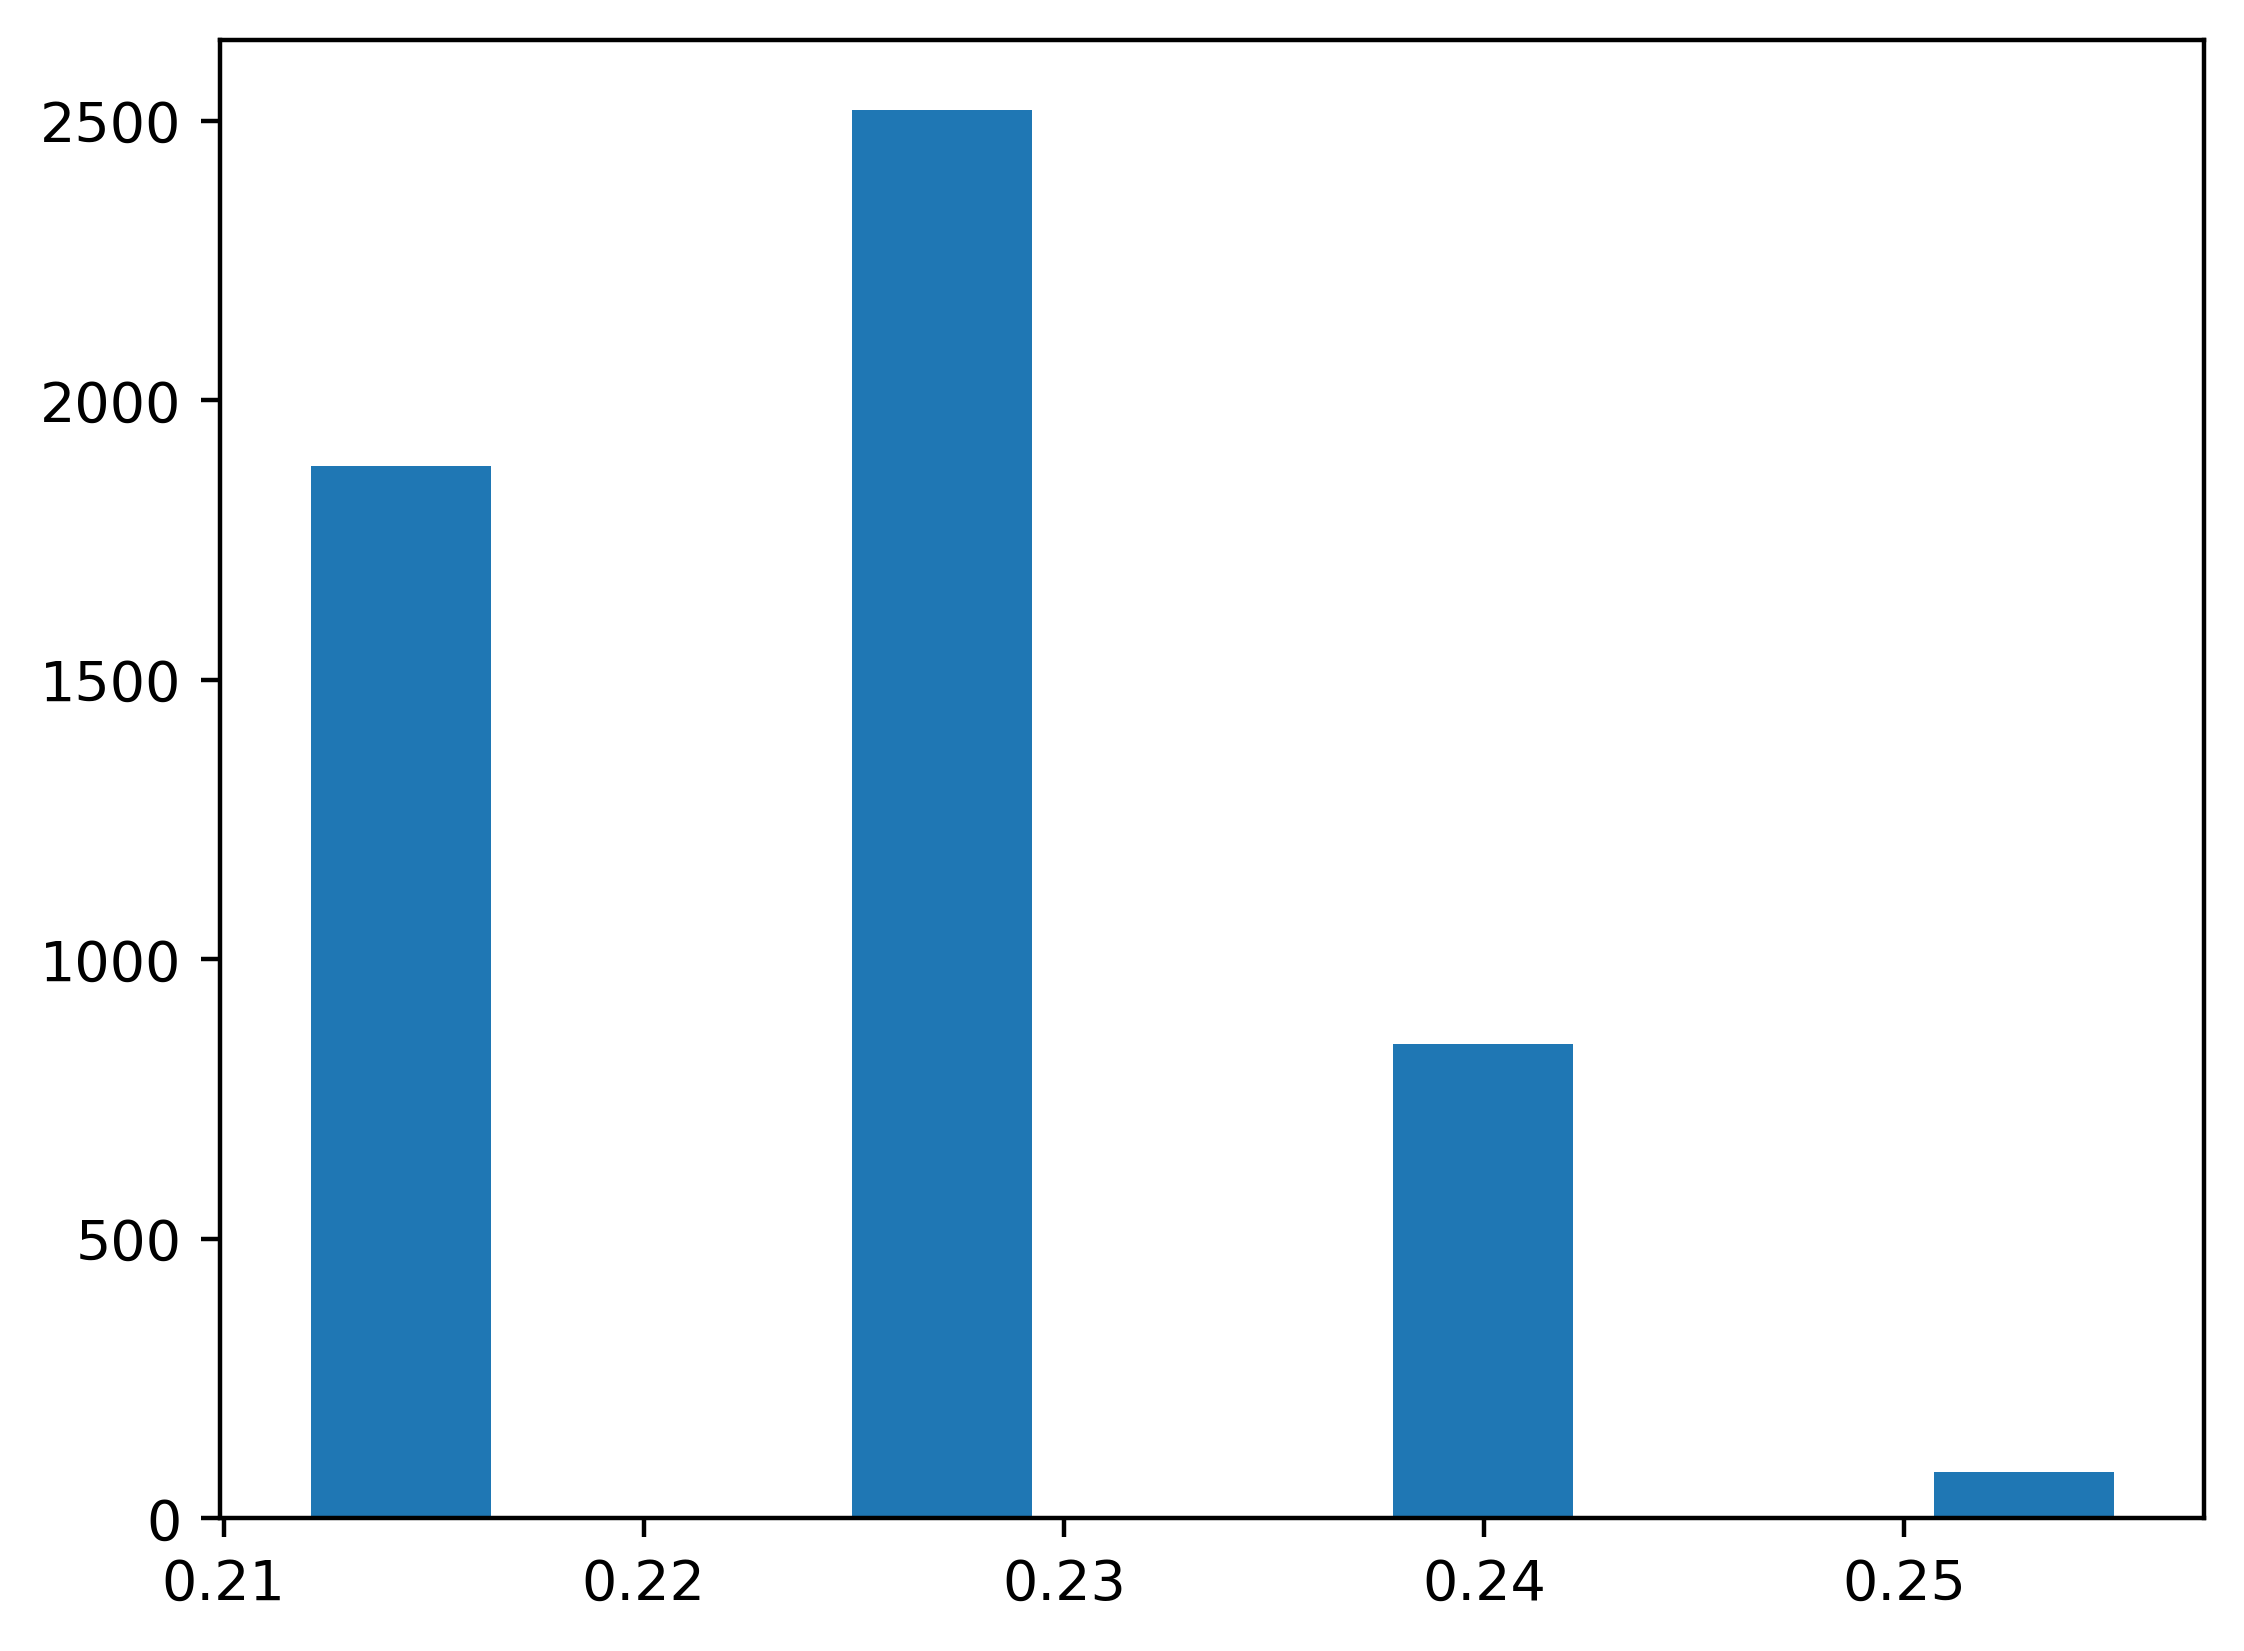

In [57]:
# 6) Execute este código para ver a saída da função de histograma e uma plotagem não formatada:
plt.hist(pos_proba)

Essas informações podem ser úteis e também poderiam ser obtidas diretamente a partir da função "np.histogram()". No estanto, aqui estamos mais interessados na plotagem.

Text(0, 0.5, 'Number of samples')

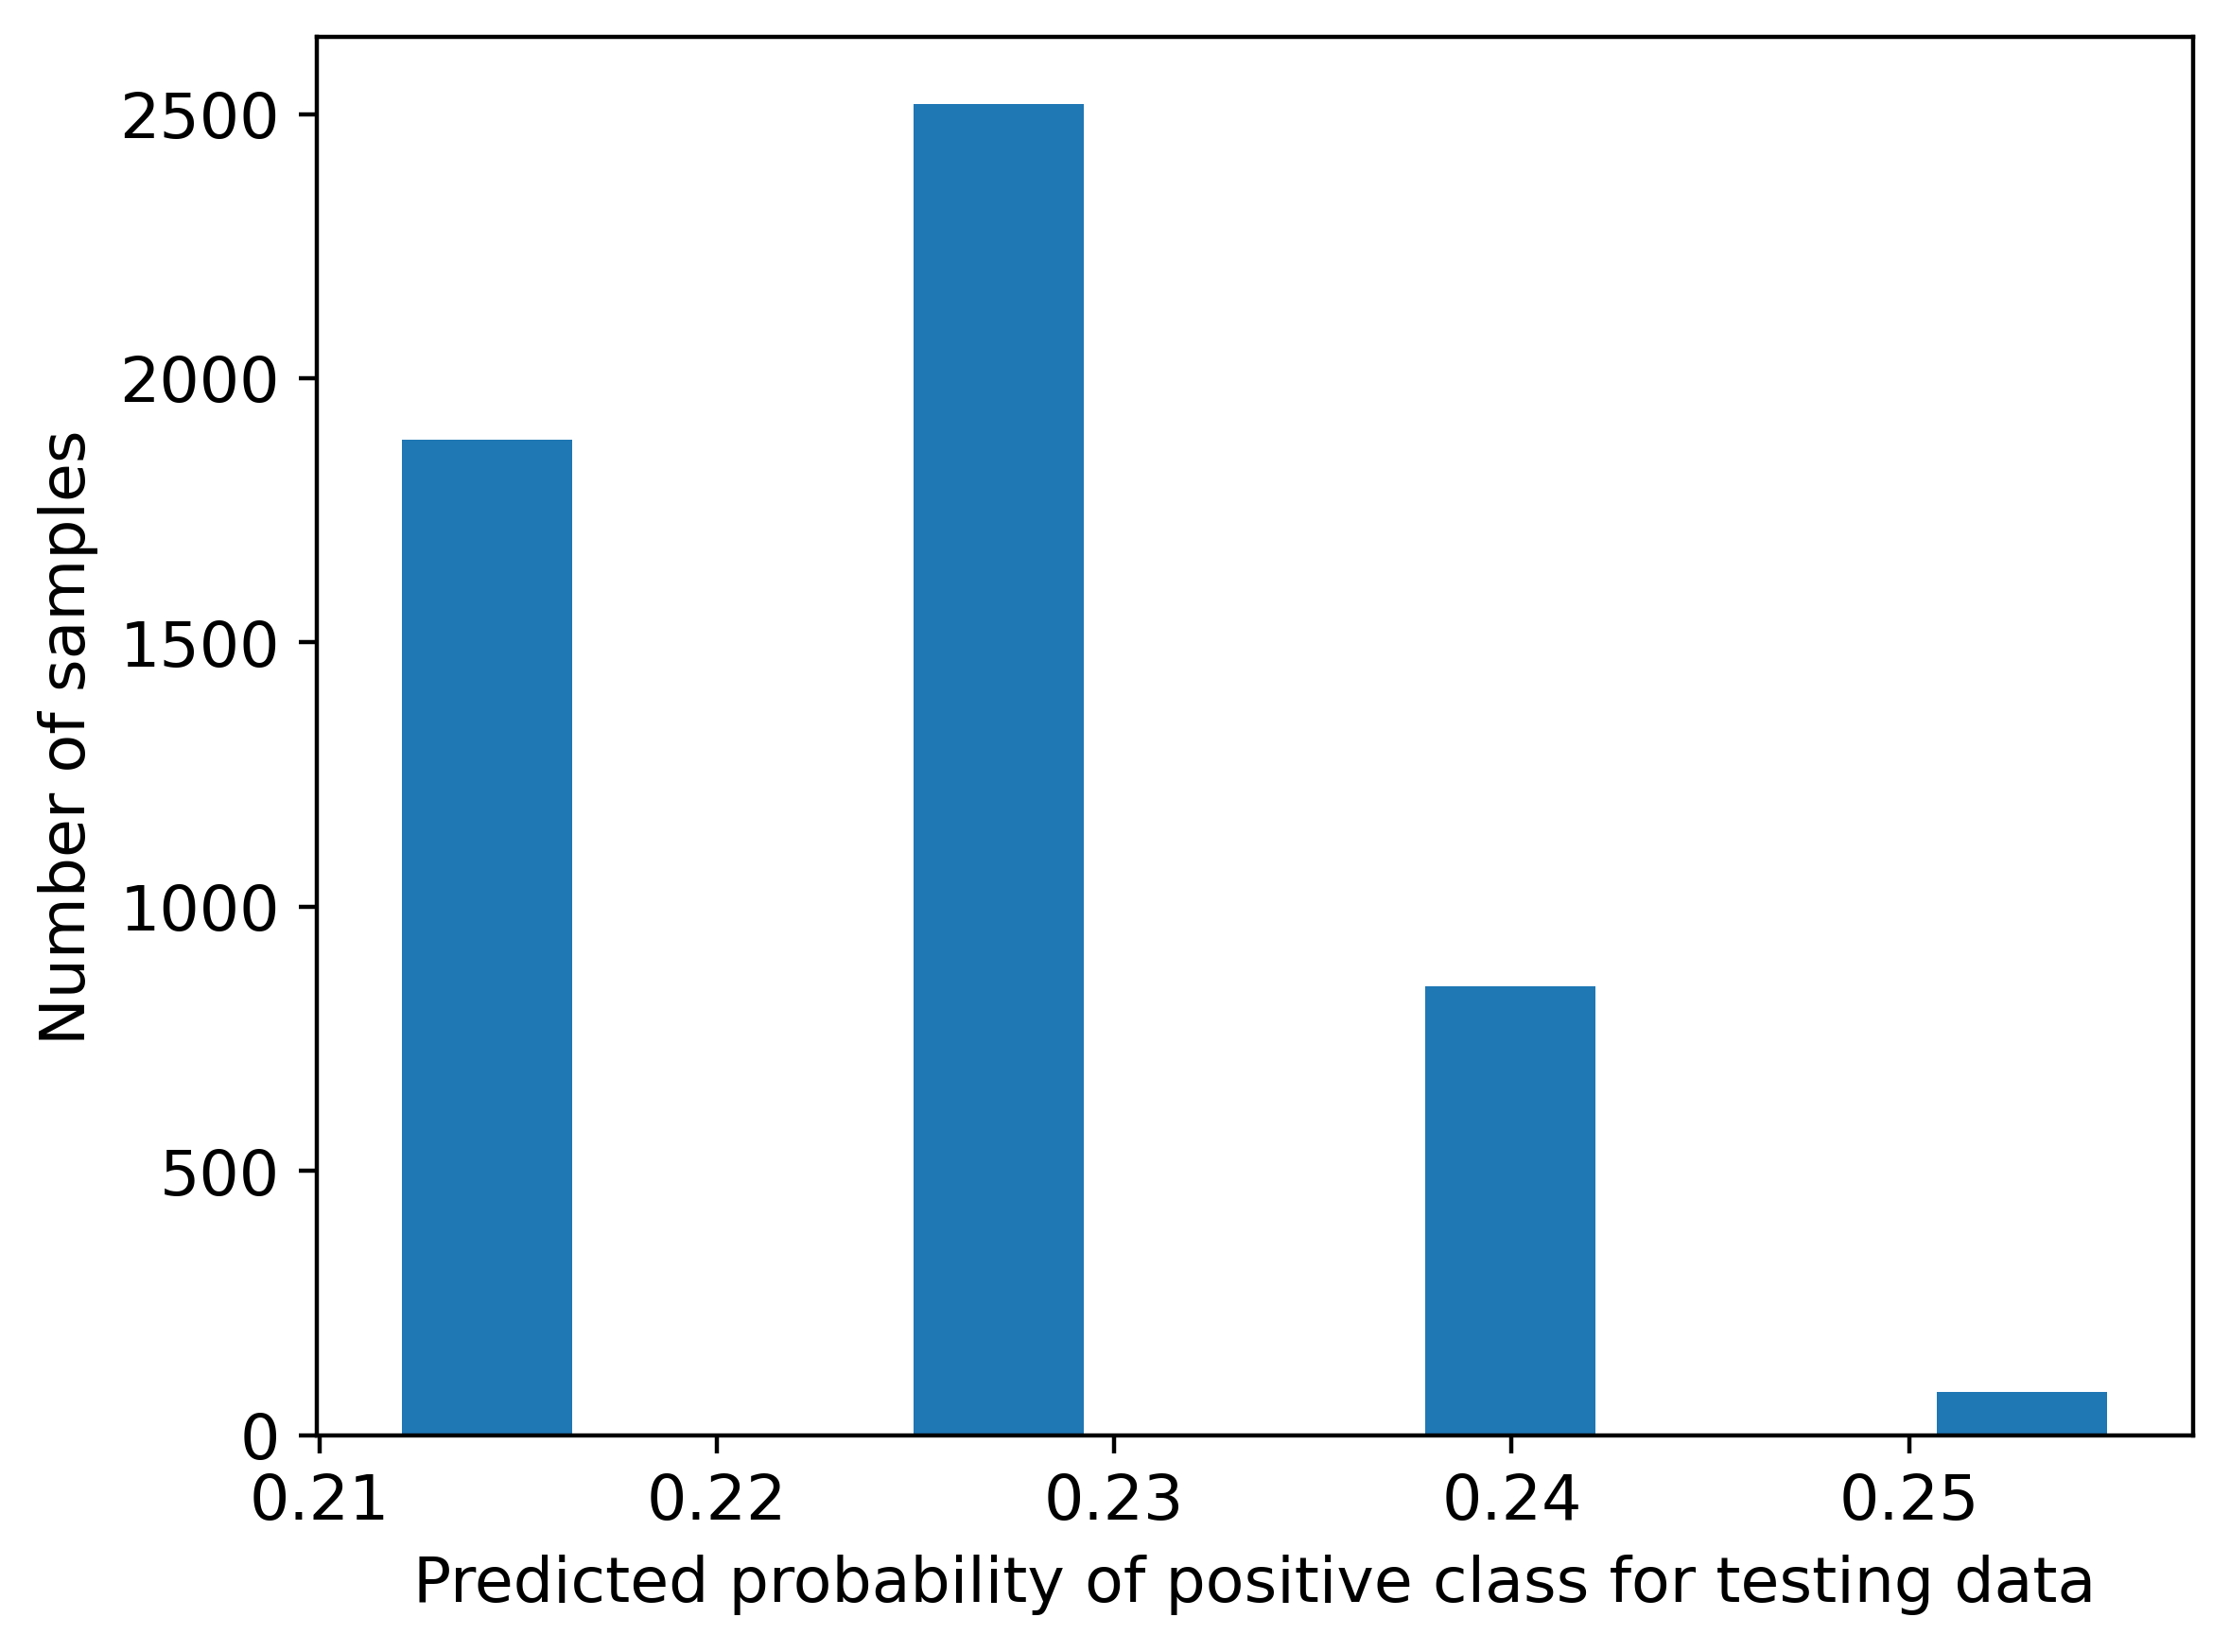

In [58]:
# 7) Execute este código para ver a plotagem formatada do histograma das probabilidades previstas:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [59]:
# 8) Isolar as probabilidades previstas das amostras positivas e negativas com este código:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Agora queremos plotar essas probabilidades como um histograma empilhado. O código é semelhante ao do histograma que foi criado anteriormente, exceto por ser passada uma lista dos arrays a serem plotados, que são os arrays de probabilidades de amostras positivas e negativas que acabamos de criar, e uma palavra-chave indicando que queremos que as barras sejam empilhadas em vez de plotadas lado a lado. Também criaremos uma legenda para que as cores sejam claramente identificáveis na plotagem.

Text(0, 0.5, 'Number of Samples')

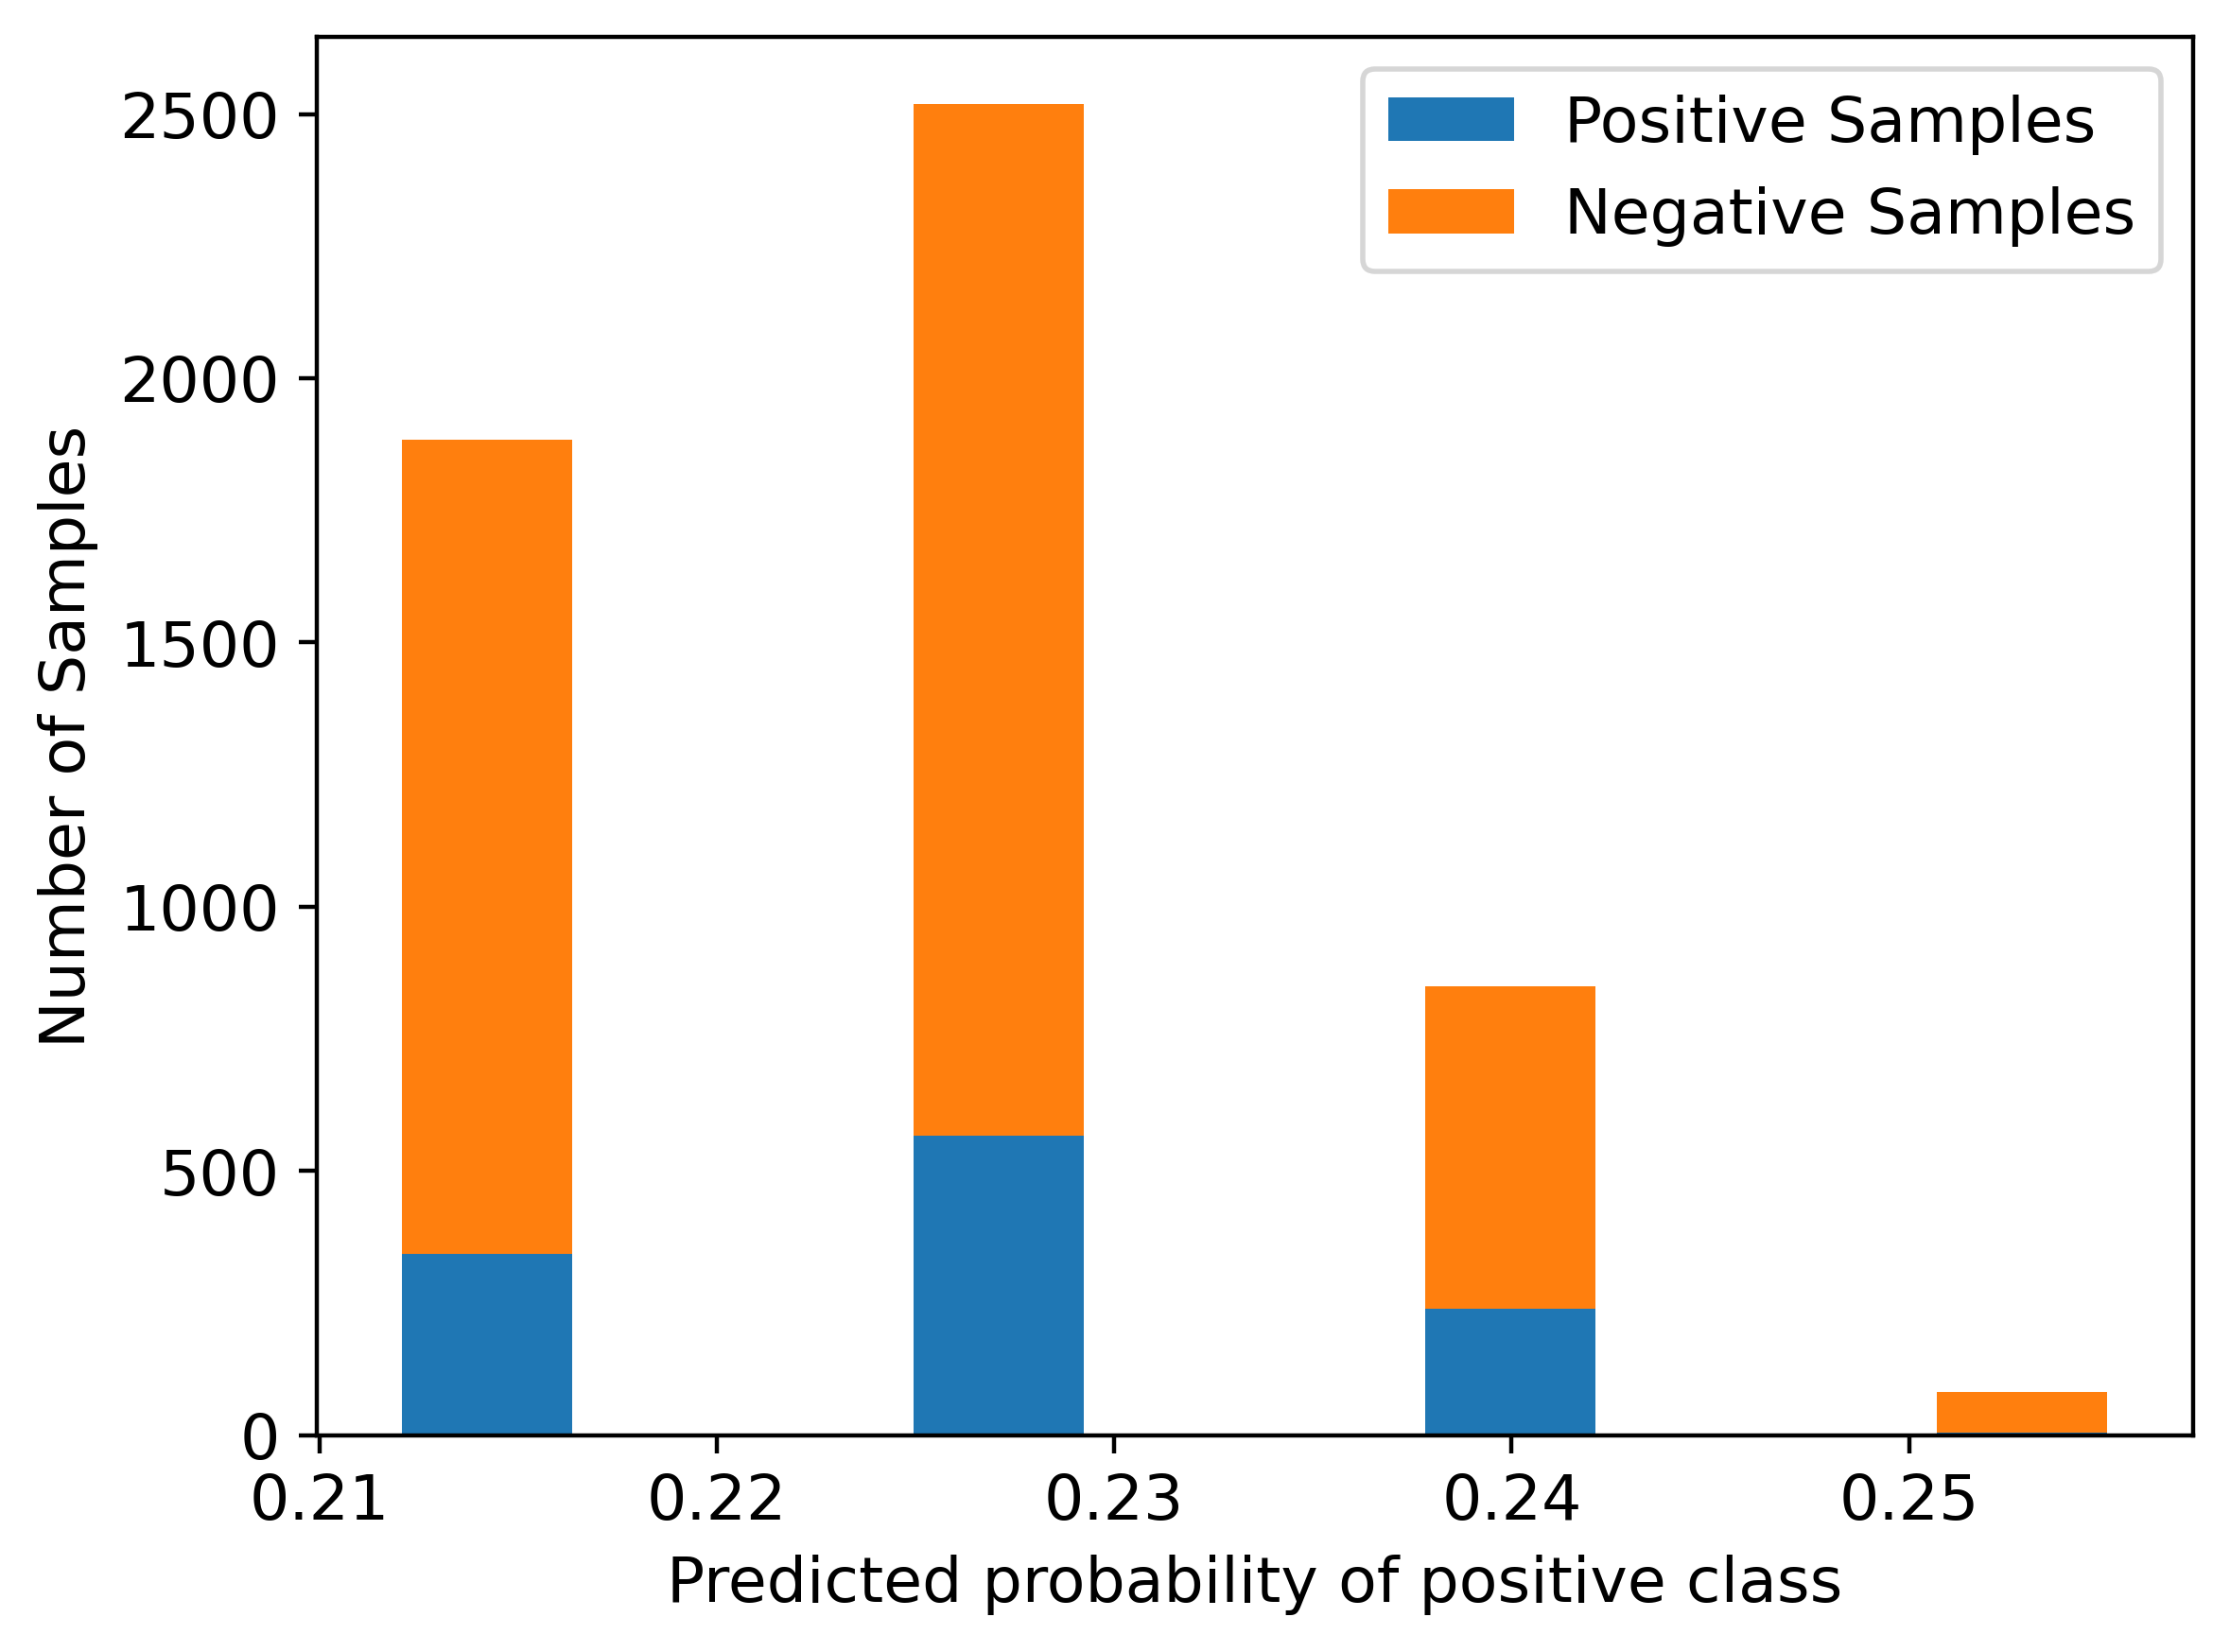

In [60]:
# 9) Plote um histograma empilhado com o código a seguir:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive Samples', 'Negative Samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of Samples')

A plotagem mostra o rótulo verdadeiro das amostras para cada probabilidade prevista por classe.

### Curva Receiver Operating Characteristic (ROC)

A definição de um limite para o classificador depende de encontrarmos um "ponto de equilibrio" no qual possamos recuperar com sucesso verdadeiros positivos suficientes sem gerar excesso de falsos positivos. À medida que baixarmos o limite, haverá mais de ambos. Um bom classificador consegue capturar mais verdadeiros positivos sem gerar um número maior de falsos positivos.Qual será o efeito de baixarmos ainda mais o limite com as probabilidades previstas do exercício anterior? Há um método clássico de visualização em machine learning, com a métrica correspondente, que ajuda a responder a esse tipo de pergunta.

A curva receiver operating characteristic (ROC, característica de operação do receptor)é uma plotagem dos pares de taxas de verdadeiros positivos (eixo y) e falsos positivos (eixo x) que resulta da dimunuição do limite de 1 até 0.

In [61]:
# Execute esse código para usar o scikit-learn a fim de gerar os arrays de TPRs e FPRs da curva ROC.
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'Roc Curve')

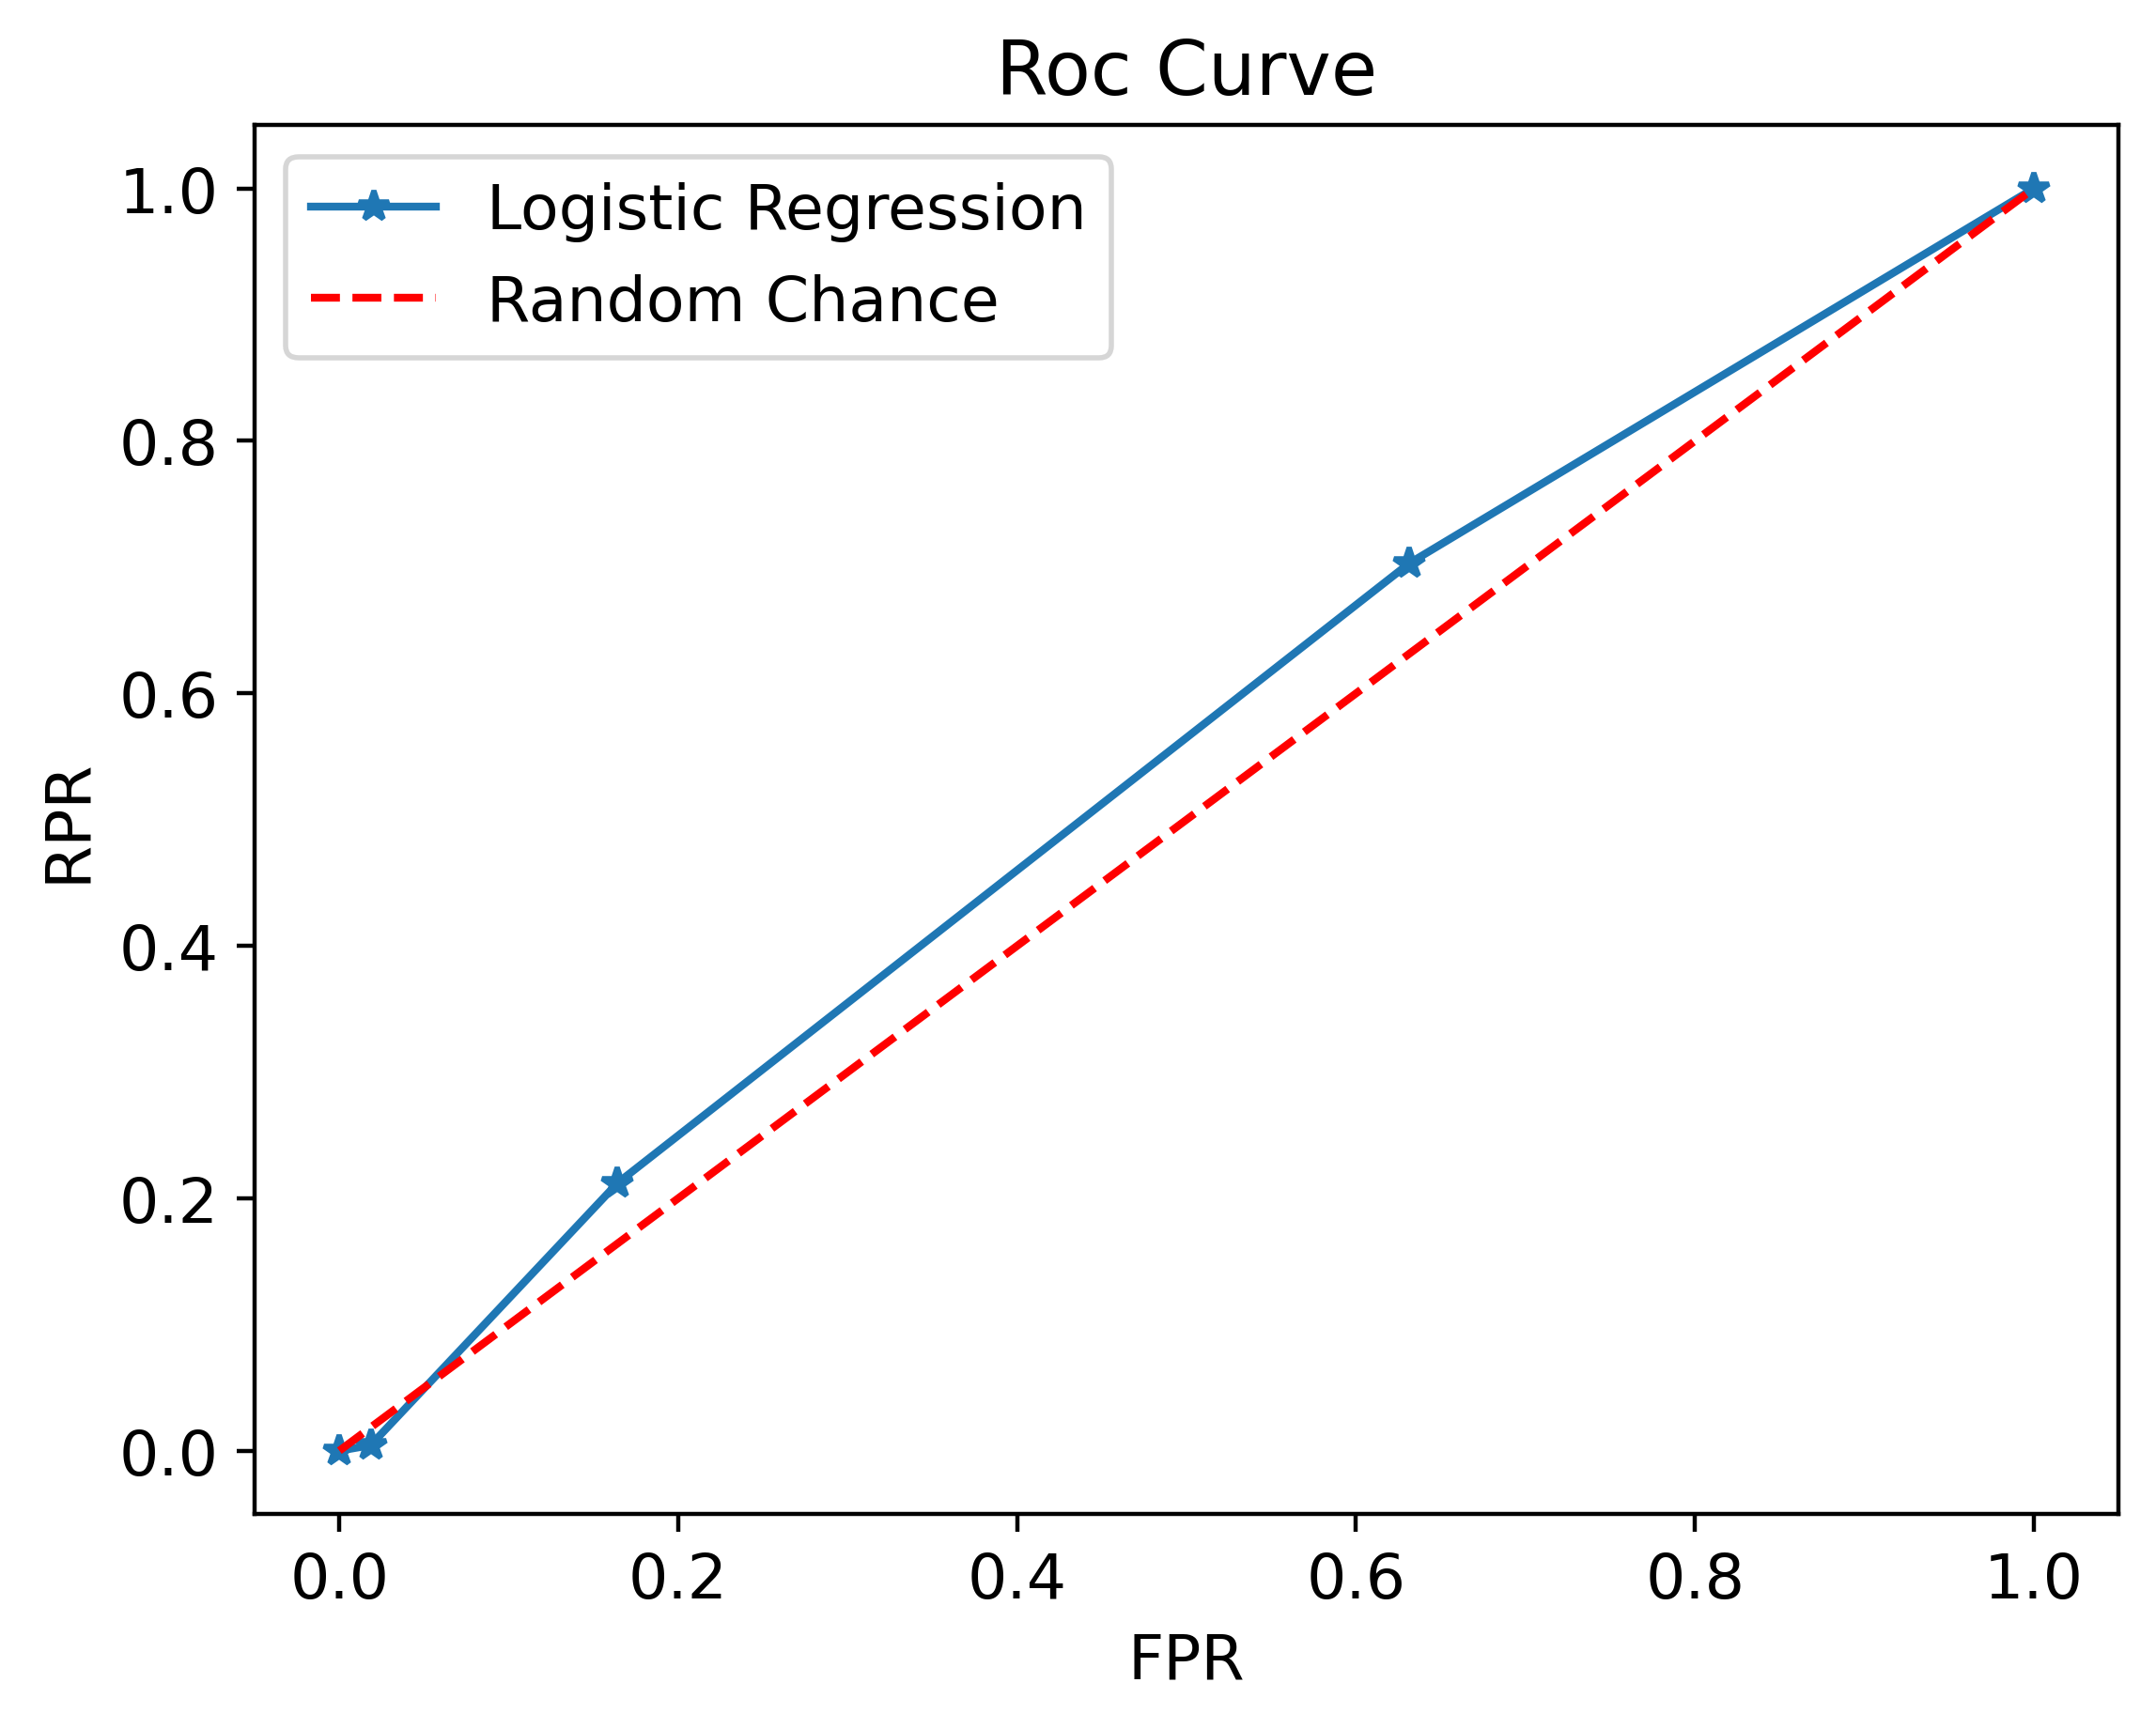

In [62]:
# Esse código produz a plotagem da curva ROC
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic Regression', 'Random Chance'])
plt.xlabel('FPR')
plt.ylabel('RPR')
plt.title('Roc Curve')

##### Curva ROC de nossa regressão logística, com uma linha de chance aleatória sendo exibida a título de comparação

In [63]:
# Visualize os limites usados para calcular a curva ROC usando o código abaixo:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

Já que a métrica é tão importante, é claro que o scikit-learn tem uma maneira conveniente de cálculá-la. Veremos qual é a ROCAUC do classificador de regressão logística passando as mesmas informações que fornecemos para a função "roc_curve".

In [64]:
# Cácule a área sob a curva ROC com este código:
metrics.roc_auc_score(y_test, pos_proba) # ROC AUC da regressão logística

0.5434650477972642

A ROC AUC da regressão logística chega perto de 0.5, o que siginifica que ela não é um classificador muito eficaz. Isso não é surpresa, considerando-se que não tivemos trabalho para determinar que características do pool de candidatas são realmente úteis nesse momento.
Estamos apenas nos acostumando à sintaxe de ajuste de modelos e aprendendo a maneira de calcular métricas de qualidade usando um modelo simples contendo apenas a características EDUCATION. Posteriormente, ao considerar outras características, esperamos obter uma ROC AUC mais alta.

### Precisão

Consideramos a métrica de classificação introduzida sem detalhes anteriormente; a precisão. Como a curva ROC, esse diagnóstico é útil para um intervalo de limites. A precisão é definida da seguinte forma:
    
    precisao = TP / TP + FP (EQUAÇÂO DA PRECISÂO)
    
    A uma função conveniente no scikit-learn para calcular a precisão, junto com o recall (também conhecido como taxa de verdadeiros positivos), para um intervalo de limites: "metrics.precision_recall_curve"